- Regresion logistica: La regresión logística es adecuada para problemas de clasificación donde la variable objetivo es categórica, por lo que no nos interesa. Probamos la regresion lineal: 

## regresion lineal

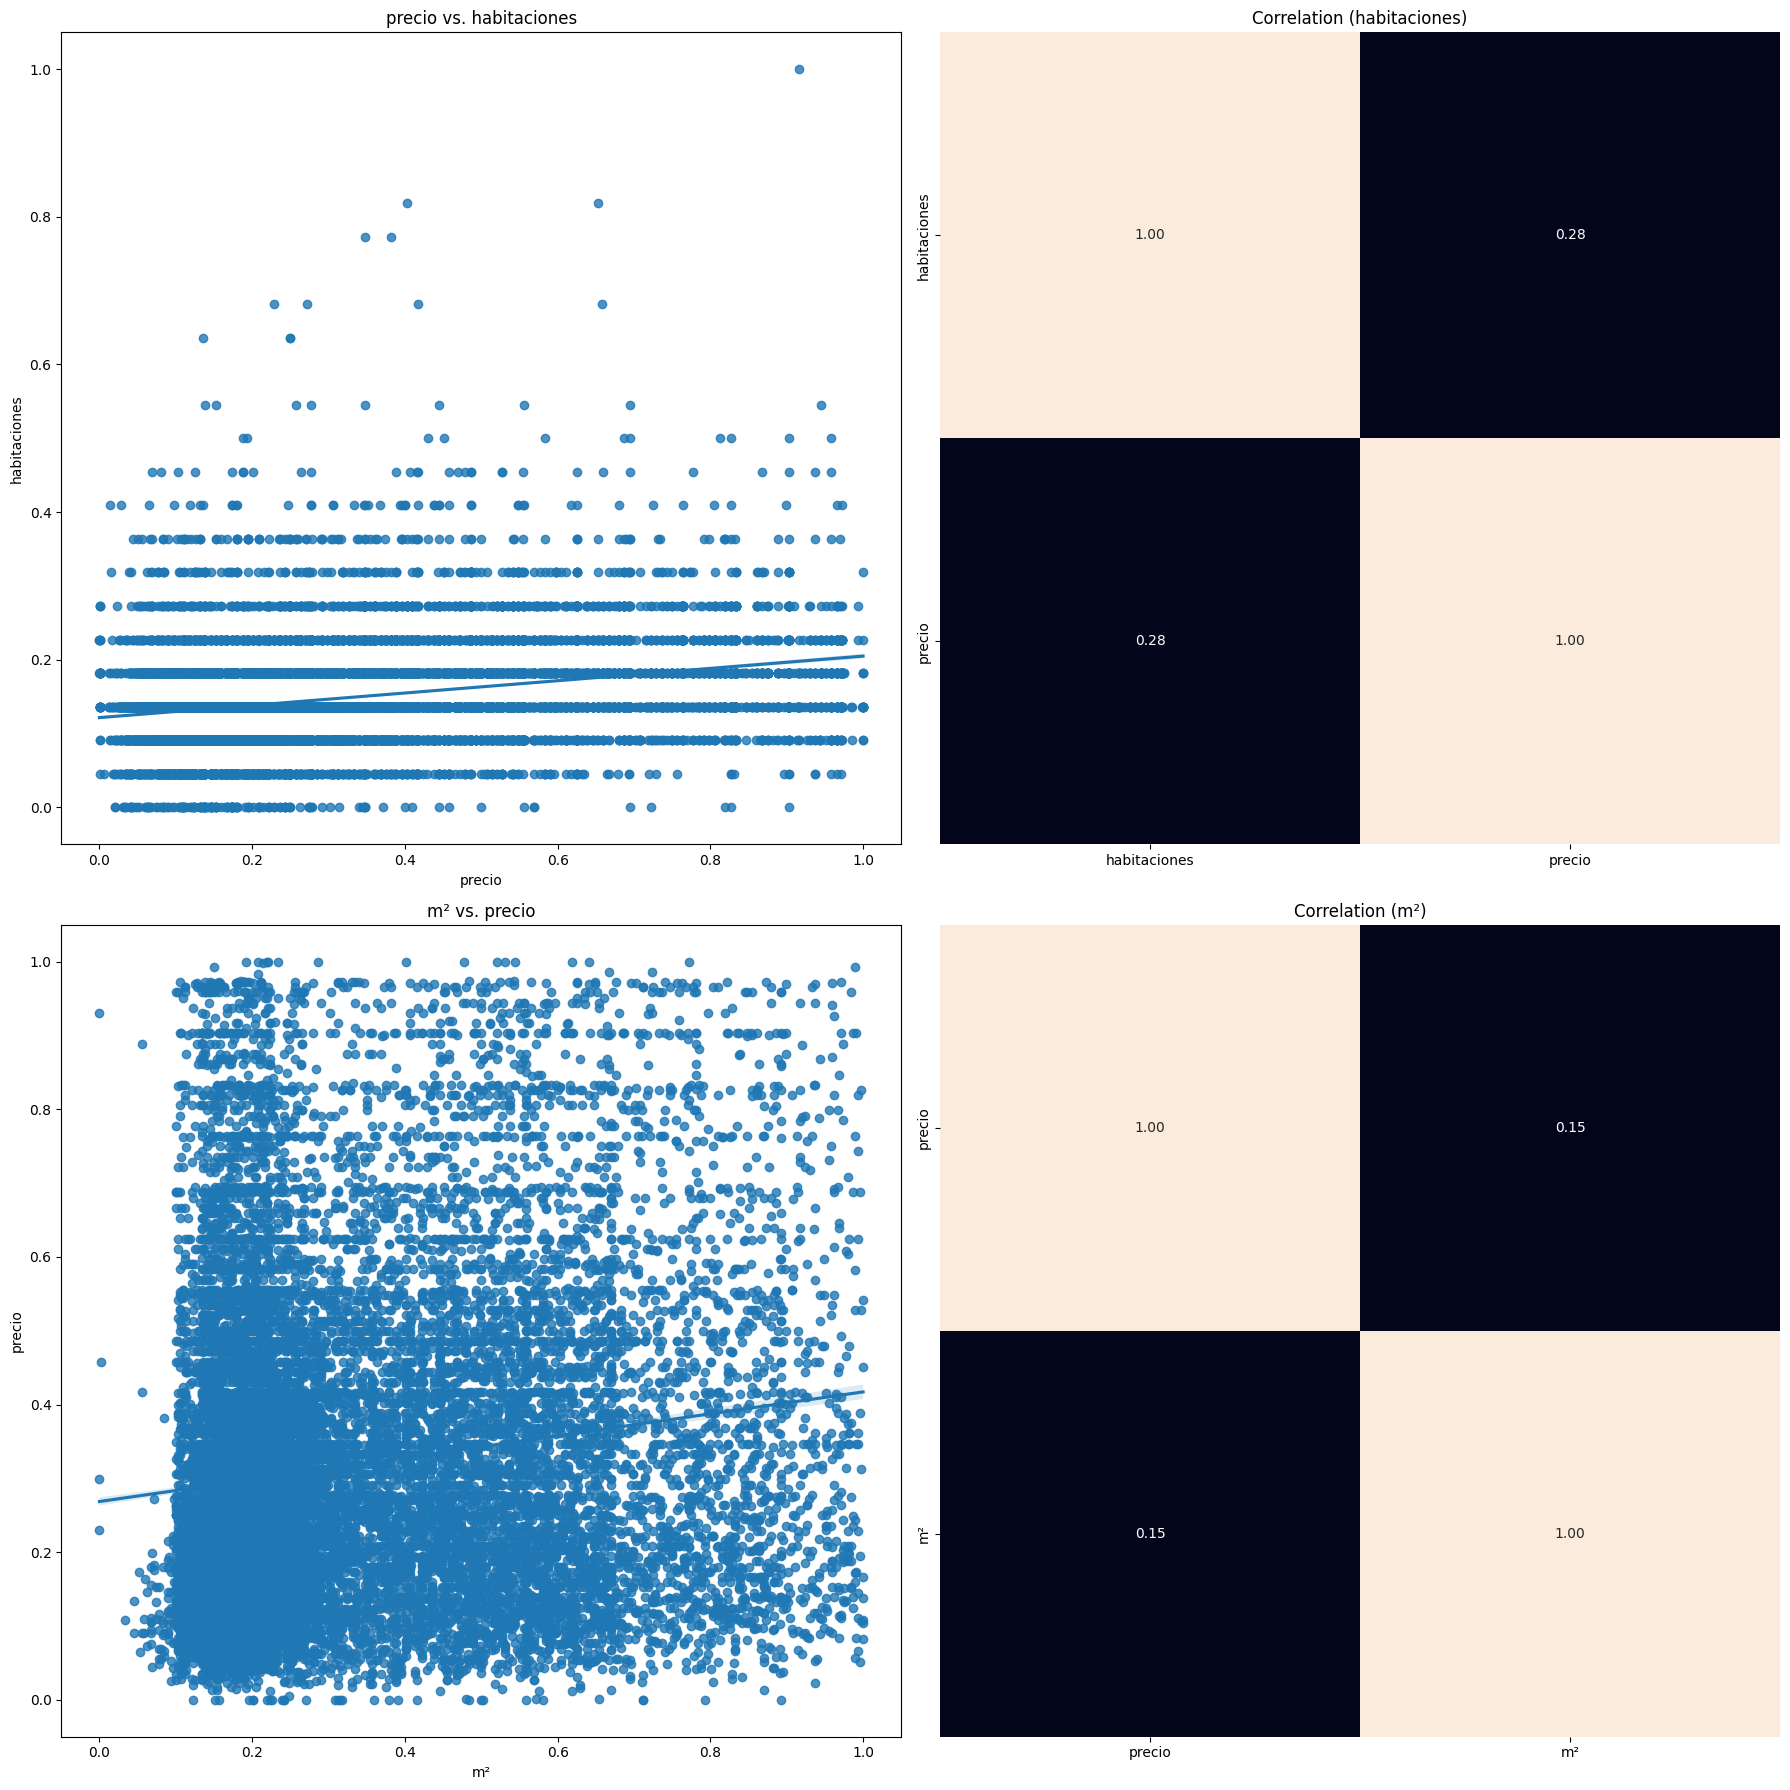

Intercepto (a): 0.15442718611409575
Coeficientes (b1, b2): [0.89688404 0.09216713]
Error cuadrático medio: 0.0420305308513044
Coeficiente de determinación (R2): 0.07096588771311096


In [23]:
# Paso 1: Lectura del conjunto de datos procesado
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lectura de los datos de entrenamiento y prueba
train_data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/train_selected.csv')
test_data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/test_selected.csv')

train_data.head()

# Diagramas de dispersión y correlaciones
fig, axis = plt.subplots(2, 2, figsize=(18, 18))
total_data = pd.concat([train_data, test_data])

# Scatter Plot 1
sns.regplot(data=total_data, x="precio", y="habitaciones", ax=axis[0, 0])
axis[0, 0].set_title("precio vs. habitaciones")

# Heatmap 1
sns.heatmap(total_data[["habitaciones", "precio"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)
axis[0, 1].set_title("Correlation (habitaciones)")

# Scatter Plot 2
sns.regplot(data=total_data, x="m²", y="precio", ax=axis[1, 0])
axis[1, 0].set_title("m² vs. precio")

# Heatmap 2
sns.heatmap(total_data[["precio", "m²"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 1].set_title("Correlation (m²)")

plt.tight_layout()
plt.show()

# Paso 2: Inicialización y entrenamiento del modelo
from sklearn.linear_model import LinearRegression

# Variables predictoras y variable objetivo
X_train = train_data[['habitaciones', 'm²']]
y_train = train_data['precio']
X_test = test_data[['habitaciones', 'm²']]
y_test = test_data['precio']

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Después del proceso de entrenamiento podemos conocer los parámetros que ha ajustado el modelo
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

# Paso 3: Predicción del modelo
y_pred = model.predict(X_test)

# Paso 4: Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación (R2): {r2_score(y_test, y_pred)}")


## optimizacion con gridsearch

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Definimos los hiperparámetros que queremos ajustar
hyperparams = {
    'copy_X': [True, False],
}

# Inicializamos la búsqueda en cuadrícula
grid = GridSearchCV(model, hyperparams, scoring='neg_mean_squared_error', cv=5)

# Realizamos la búsqueda en cuadrícula en los datos de entrenamiento
grid.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid.best_params_}")

# Obtenemos el mejor modelo
best_params = grid.best_params_
best_model = grid.best_estimator_

# Realizamos predicciones en los datos de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calculamos el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Mostramos los resultados
print(f"Mejores hiperparámetros: {best_params}")
print(f"Test MSE: {mse}")


Mejores hiperparámetros: {'copy_X': True}
Mejores hiperparámetros: {'copy_X': True}
Test MSE: 0.0420305308513044


## optimizacion con random search

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define los hiperparámetros y sus posibles valores
param_dist = {'alpha': np.logspace(-3, 2, 100)}  # Valores de alpha en una escala logarítmica

# Inicializa la búsqueda aleatoria
random_search = RandomizedSearchCV(ridge_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Realiza la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtiene los mejores hiperparámetros
best_params = random_search.best_params_
best_alpha = best_params['alpha']

# Obtiene el mejor modelo Ridge con los mejores hiperparámetros
best_ridge_model = random_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha (Ridge): {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha (Ridge): 0.029150530628251757
Test MSE (Ridge): 0.042030293824127145


---

## regresion lineal regularizada

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Inicializa el modelo Ridge
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar el valor de alpha según sea necesario

# Ajusta el modelo a los datos de entrenamiento
ridge_model.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred_ridge = ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Calcula el coeficiente de determinación (R^2)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Test MSE (Ridge): {mse_ridge}")
print(f"Test R^2 (Ridge): {r2_ridge}")


Test MSE (Ridge): 0.042023558854985606
Test R^2 (Ridge): 0.07111999526968249


## optimizacion con gridsearch

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define los hiperparámetros y sus posibles valores
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Inicializa la búsqueda en cuadrícula
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Realiza la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_
best_alpha = best_params['alpha']

# Obtiene el mejor modelo Ridge con los mejores hiperparámetros
best_ridge_model = grid_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha: {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha: 0.01
Test MSE (Ridge): 0.04203044930301829


## optimizacion con random search

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define los hiperparámetros y sus posibles valores
param_dist = {'alpha': np.logspace(-3, 2, 100)}  # Valores de alpha en una escala logarítmica

# Inicializa la búsqueda aleatoria
random_search = RandomizedSearchCV(ridge_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Realiza la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtiene los mejores hiperparámetros
best_params = random_search.best_params_
best_alpha = best_params['alpha']

# Obtiene el mejor modelo Ridge con los mejores hiperparámetros
best_ridge_model = random_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha (Ridge): {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha (Ridge): 0.029150530628251757
Test MSE (Ridge): 0.042030293824127145
